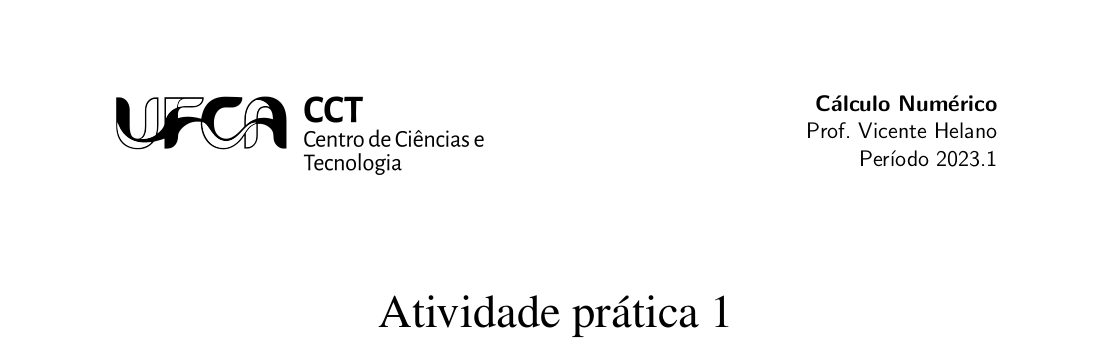

### **Nome:** _(digite aqui seu nome)_

Você está projetando um sistema para calcular a trajetória de um robô aspirador autônomo.
O sistema deve ser capaz de conduzir o robô no interior de uma casa sem que haja colisões com móveis, paredes ou objetos que não possam ser aspirados.
Na primeira fase do projeto, o sistema deve passar pelo seguinte teste.

## Objetivo

Calcular uma trajetória para o robô de modo que ele se mantenha sempre o mais próximo possível de uma parede, sem que ocorra colisões.

## Formulação

Considere um cômodo ilimitado, representado pelo plano euclideano $\mathbb{E}^2$, constituído de uma única parede de comprimento infinito representada por uma reta $L$, definida pelos pontos $P(12,12)$ e $Q(24,24)$.
Suponha o robô inicialmente posicionado no ponto $O(0,17\delta)$, onde $\delta = 2^{-53}$.

In [ ]:
import numpy as np

delta = 2.0**(-53)
O = np.array([0.0,17.0*delta])
P = np.array([12.0,12.0])
Q = np.array([24.0,24.0])
print(O)
print(P)
print(Q)

[0.00000000e+00 1.88737914e-15]
[12. 12.]
[24. 24.]


Observe que o robô se encontra inicialmente "acima" da parede definida por $P$ e $Q$.

## Restrições

Os únicos dados que estarão disponíveis para embasar a decisão de movimentação do robô são os pontos $P$, $Q$, $O$ e a posição atual do robô, denotada por $R(R_x,R_y)$.

O robô deve se mover somente na direção de um dos pontos cardeais (Norte, Sul, Leste e Oeste) ou dos pontos colaterais (Nordeste, Noroeste, Sudeste e Sudoeste), usando combinações de incrementos de tamanho $\pm\delta$ na direção  dos eixos $x$ e $y$.

## Condição de parada

O robô deverá caminhar até que a distância horizontal de $R$ até a origem $O$ seja de $34\delta$ unidades, aqui denotada por $d_{\max}$.

In [ ]:
d_max = 34*delta
d_max

3.774758283725532e-15

## Representação da trajetória

A trajetória calculada deve ser representada por uma `list` contendo todos os pontos percorridos pelo robô, iniciando da posição $O$, isto é, uma lista de `numpy.arrays`.

In [ ]:
T = [O]
T

## Detecção de colisões

Para o cálculo da trajetória, é preciso determinar se o robô poderá caminhar para uma nova posição, de sua escolha, pois ele não poderá se chocar com a parede.
Neste sentido, denote por $C(C_x,C_y)$ uma possível posição para onde o robô será deslocado, denominada *posição candidata*.
Aplicando conceitos da [geometria analítica](https://www.colegioweb.com.br/estudo-da-reta/posicao-dos-pontos-de-um-plano-em-relacao-a-uma-reta.html), é possível verificar se o robô colidirá com a parede ao analisar a posição relativa do ponto candidato $C$ com relação à reta $L$ (parede) definida pelos pontos $P$ e $Q$.

*(a) Implemente uma função para determinar se o ponto $C$ é válido, isto é, se ele não provocará uma colisão entre o robô e a parede.
Você deve implementar a solução descrita [aqui](https://www.colegioweb.com.br/estudo-da-reta/posicao-dos-pontos-de-um-plano-em-relacao-a-uma-reta.html).
Como o robô inicia a trajetória acima da reta, basta verificar se ele toca ou atravessa a parede.
Sua função deverá retornar `True` no caso de colisão e `False`, caso contrário.*

In [ ]:
def colide(P,Q,C):
    """
    Verifica se a ponto C colide com a parede PQ.

    Argumentos:
        P,Q,C (numpy.array): pontos do plano euclideano.

    Retorno:
        bool: True (colide) ou False (não colide).
    """
    # seu código inicia aqui

**Verificação:** *observe que a origem $O$ está localizada à esquerda da reta $L$, considerando a regra da mão direita aplicada  à sequência de pontos $P$, $Q$, $O$.
Portanto, o resultado da execução da célula abaixo deve ser `False`. Experimente também outros pontos diferentes de $O$.*

In [ ]:
colide(P,Q,O)

## Cálculo da trajetória

*(b) Implemente agora a função que calculará a trajetória do robô.
 É mandatório o uso do teste de colisão implementado anteriormente.*

In [ ]:
def trajetoria(P,Q,O):
    """
    Calcula a trajetória de um robô inicialmente posicionado
    no ponto O, ladeando a parede definida pela reta PQ.

    Argumentos:
        P,Q (numpy.array): pontos que definem a parede.
        O (numpy.array): posição inicial do robô.

    Retorno:
        T (list(numpy.array)): lista de pontos da trajetória
    """
    # seu código inicia aqui

**Verificação:** *agora, você pode executar o seu algoritmo e visualizar a trajetória calculada usando a função `desenha` abaixo.*

In [ ]:
import matplotlib.pyplot as plt

def desenha(T):
    """
    Desenha o gráfico da trajetória calculada.
    
    Argumentos:
      T (list(np.array)): lista dos pontos da trajetória
      
    Saída:
      figura da matplotlib
    """
    x = np.array(T)[:,0] # coordenadas x da trajetória
    y = np.array(T)[:,1] # coordenadas y da trajetória
    
    # Visualização da trajetória
    fig,ax = plt.subplots()
    ax.plot([0.0,d_max], [0.0,d_max], 'black', label='parede', lw=2) # parede
    ax.plot(x,y, 'red', label='trajetória', lw=2) # trajetória
    ax.legend()
    plt.show()

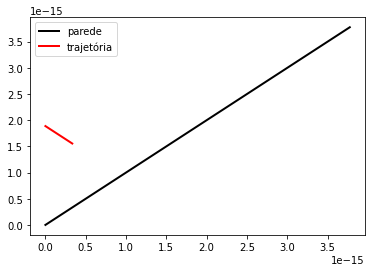

In [ ]:
# Cálculo da trajetória
T = trajetoria(P,Q,O)

# Gráfico da trajetória
desenha(T)

## Avaliando a trajetória

Sabendo que o comprimento da trajetória ótima é $d_{\operatorname{opt}} \approx 5{,}338314359524833 \times 10^{-15}$, calcule o erro relativo percentual que seu algoritmo cometeu.

*(c) Implemente uma função que recebe a trajetória calculada e a distância percorrida correspondente.*

In [ ]:
def distancia(T):
  """
    Calcula o comprimento da trajetória T.
    
    Argumentos:
      T (list(np.array)): lista dos pontos da trajetória.
      
    Saída:
      (double): comprimento da trajetória T.
    """
    # seu código inicia aqui

**Verificação:** *agora, calcule abaixo o erro relativo percentual cometido.*

In [ ]:
# seu código inicia aqui

## Saiba mais

* A implementação exata da função `colide`  pode ser obtida usando a função `orient2d` do pacote [`geompreds`](https://pypi.org/project/geompreds/).
Este pacote é uma API em Python para utilizarmos os [predicados geométricos exatos de Shewchuck](https://www.cs.cmu.edu/~quake/robust.html).
Ele nos garante que o resultado do teste da posição relativa de um ponto com relação a uma reta sempre dê exato.

* Quer saber como plotar gráficos com a Matplotlib? Veja o vídeo:

In [1]:
from IPython.display import HTML, IFrame 
IFrame(src="https://www.youtube.com/embed/1-R5b3dTvhs", width=320, height=240)

* Esta atividade foi inspirada no artigo [Classroom Examples of Robustness Problems in Geometric Computations](https://link.springer.com/chapter/10.1007/978-3-540-30140-0_62), de Kettner et al. (2004).

&copy; 2023 Vicente Helano  
UFCA | Centro de Ciências e Tecnologia